Implement various clustering algorithms in colabs


a) K-Means clustering from scratch

b) Hierarchical clustering (not from scratch)

c) Gaussian mixture models clustering (not from scratch)

d) DB Scan clustering (not from scratch) using pycaret library 

Dataset Used: 
PlayStation games sales data set available at https://www.kaggle.com/sidtwr/videogames-sales-dataset?select=PS4_GamesSales.csv

This dataset has details about the sales data of PS4 gaming console across various regions around the world.



In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import numpy as np
from numpy import matlib as mb
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import warnings
from scipy.spatial.distance import cdist 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [11]:
df = pd.read_csv('/content/gdrive/MyDrive/msse/fall-21/data-mining/PS4_GamesSales.csv',encoding='latin1')
df.head(10)

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33
7,Spider-Man (PS4),2018.0,Action-Adventure,Sony Interactive Entertainment,3.64,3.39,0.32,1.41,8.76
8,Call of Duty: Infinite Warfare,2016.0,Shooter,Activision,3.11,3.83,0.19,1.36,8.48
9,Fallout 4,2015.0,Role-Playing,Bethesda Softworks,2.91,3.97,0.27,1.34,8.48


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


Clean up null and missing values

In [13]:
df.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [14]:
df.dropna(axis= 0, inplace= True)
df.isnull().sum()

Game             0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
dtype: int64

**a) K-Means clustering from scratch**

Here we will compare the sales data between North America and Europe and visualize the data.


Text(0, 0.5, 'Europe Sales ($)')

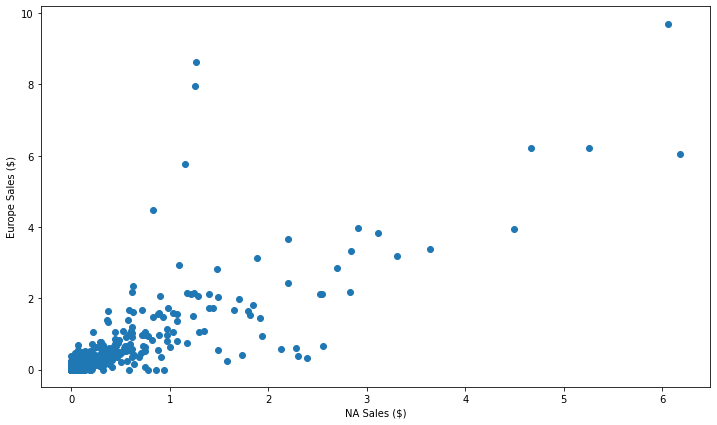

In [15]:
plt.subplots(figsize=(12,7))
plt.scatter(df['North America'], df['Europe'])
plt.xlabel('NA Sales ($)')
plt.ylabel('Europe Sales ($)')

We will use the steps below to implement K-Means
1. Randomly pick k data points as our initial Centroids.

2. Find the distance (Euclidean distance for our purpose) between each data points in our training set with the k centroids.

3. Now assign each data point to the closest centroid according to the distance found.

4. Update centroid location by taking the average of the points in each cluster group.

5. Repeat the Steps 2 to 4 till our centroids don’t change.

In [21]:
def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

# Assign cluster clusters based on closest centroid
def assign_clusters(centroids, cluster_array):
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid, 
                                           cluster_array[i]))
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters

# Calculate new centroids based on each cluster's mean
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

# Calculate variance within each cluster
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, 
                                       current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

Run the K-Means algorithm on the sales data of North America and Europe.

In [22]:
df_cluster = df[["North America", "Europe"]]
df_cluster_array = np.array(df_cluster)

In [41]:
k = 4

cluster_vars = []
centroids = [df_cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, df_cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, df_cluster_array))))
for i in range(20):
    centroids = calc_centroids(clusters, df_cluster_array)
    clusters = assign_clusters(centroids, df_cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 df_cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

0 131
1 82
2 60
3 50
4 45
5 44
6 44
7 44
8 44
9 44
10 44
11 44
12 44
13 44
14 44
15 44
16 44
17 44
18 44
19 44
20 44


We can see that with k=4 we get a nice elbow curve with the below visualization

Text(0, 0.5, 'Mean Sum of Squared Deviations')

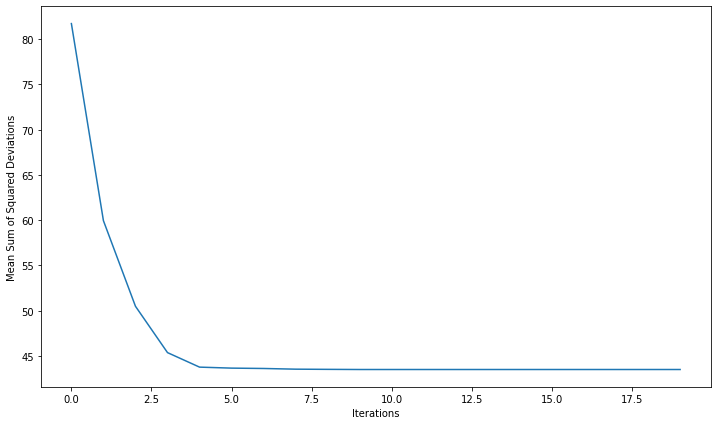

In [42]:
plt.subplots(figsize=(12,7))
plt.plot(cluster_vars)
plt.xlabel('Iterations')
plt.ylabel('Mean Sum of Squared Deviations')

Now we can visualize the effect of clustering with the before and after graph

Text(0.5, 1.0, 'Initial Clusters')

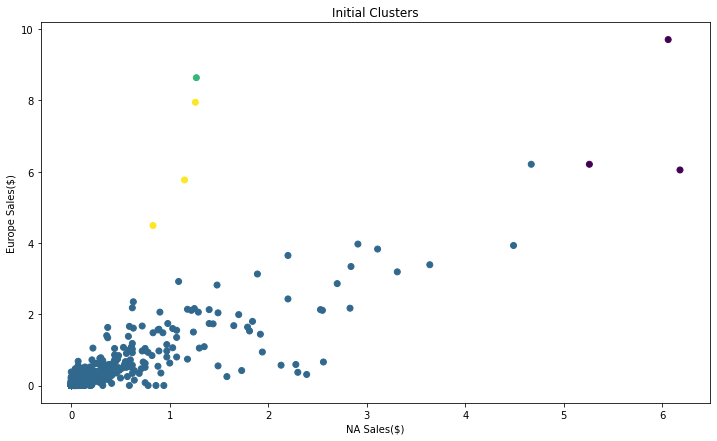

In [65]:
plt.subplots(figsize=(12,7))
plt.scatter(x=df_cluster_array[:,0], y=df_cluster_array[:,1], c=initial_clusters, cmap=plt.cm.viridis)
plt.xlabel('NA Sales($)')
plt.ylabel('Europe Sales($)')
plt.title("Initial Clusters")

Text(0.5, 1.0, 'After Clustering')

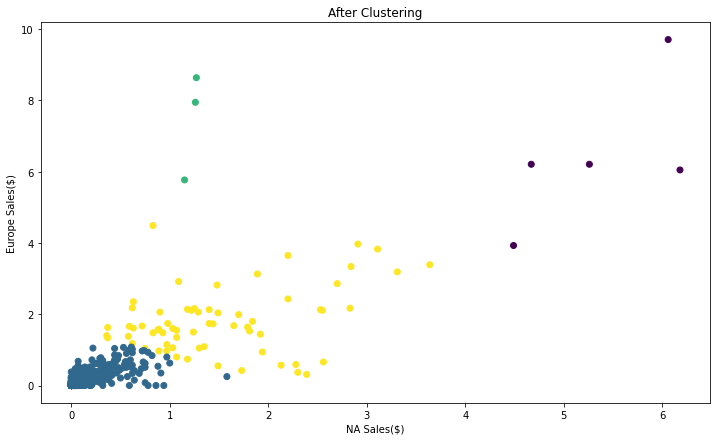

In [66]:
plt.subplots(figsize=(12,7))
plt.scatter(x=df_cluster_array[:,0], y=df_cluster_array[:,1], c=clusters, cmap=plt.cm.viridis)
plt.xlabel('NA Sales($)')
plt.ylabel('Europe Sales($)')
plt.title('After Clustering')

We can conclude from the above visuals that the K-Means algorithm did a pretty good job at clustering.

**Hierarchical Clustering**

First normalize the data

In [45]:
from sklearn.preprocessing import normalize
df_hierarchical = df[["North America", "Europe", "Japan", "Rest of World"]]
data_normalized = normalize(df_hierarchical)
data_normalized = pd.DataFrame(data_normalized, columns=df_hierarchical.columns)
data_normalized.head(10)

,North America,Europe,Japan,Rest of World
0,0.511273,0.819218,0.050621,0.254793
1,0.687020,0.672569,0.045579,0.271251
2,0.622568,0.735010,0.024855,0.267491
3,0.579120,0.770093,0.049603,0.262898
4,0.142636,0.970371,0.016847,0.194299
5,0.153480,0.968385,0.014617,0.196113
6,0.723262,0.633055,0.033827,0.273841
7,0.702705,0.654443,0.061776,0.272202
8,0.607279,0.747871,0.037101,0.265563
9,0.569631,0.777125,0.052852,0.262304


Run the hierarchical model and see the number of clusters.

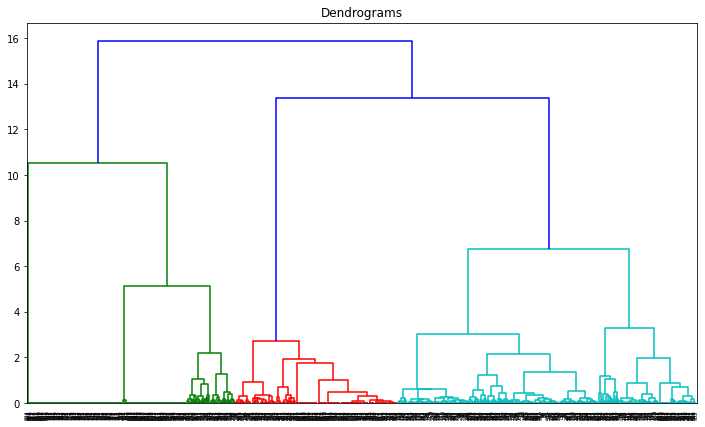

In [46]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12, 7))
plt.title("Dendrograms")
dendrogram = shc.dendrogram(shc.linkage(data_normalized, method='ward'))

We can see that there are 4 clusters

In [54]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, affinity='euclidean',linkage='ward')
cluster.fit_predict(data_normalized)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 0,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 2, 1, 2, 0, 1,

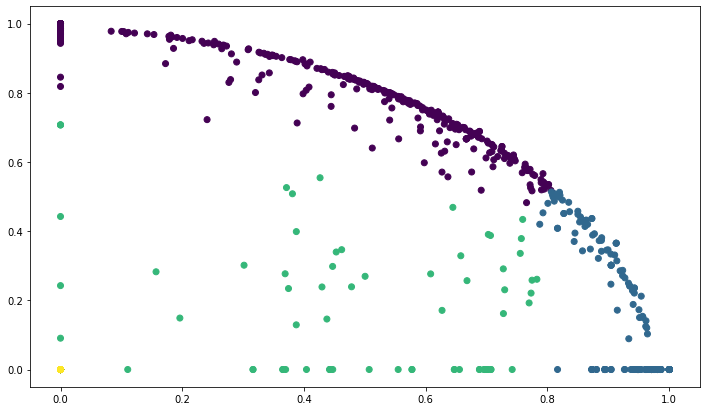

In [55]:
plt.figure(figsize=(12, 7))
plt.scatter(data_normalized["North America"], data_normalized["Europe"], c=cluster.labels_)

**Gaussian Mixture Model Clustering**

In [56]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data_normalized)

GaussianMixture(n_components=4)

In [57]:
labels = gmm.predict(data_normalized)
frame = pd.DataFrame(data_normalized)
frame['cluster'] = labels
frame.columns = ["North America", "Europe", "Japan", "Rest of World", "cluster"]

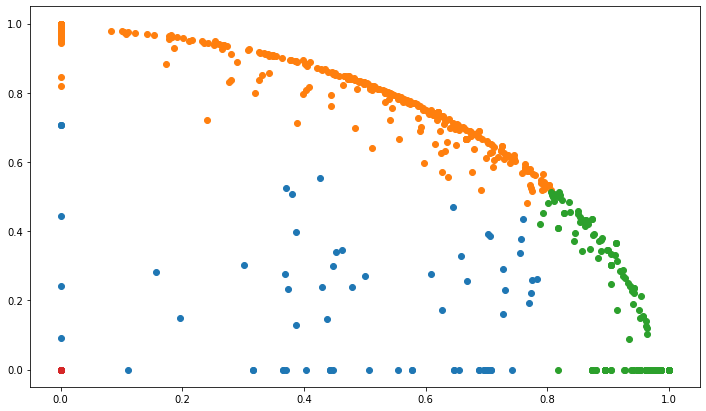

In [58]:
plt.figure(figsize=(12, 7))
for k in range(0,4):
  data = frame[frame["cluster"]==k]
  plt.scatter(data["North America"], data["Europe"], cmap=plt.cm.viridis)
plt.show()

**DBScan Clustering**

In [61]:
from sklearn.cluster import DBSCAN

db_scan = data_normalized.values
db = DBSCAN(eps=0.4, min_samples=20)
db.fit(db_scan)

DBSCAN(eps=0.4, min_samples=20)

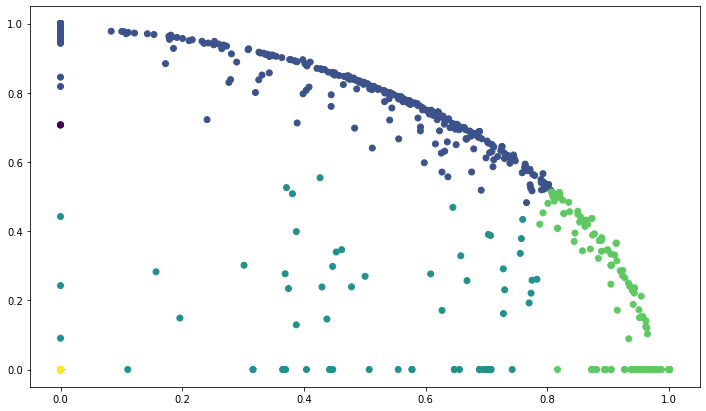

In [64]:
prediction = db.fit_predict(db_scan)
plt.figure(figsize=(12, 7))
plt.scatter(db_scan[:,0], db_scan[:,1],c=prediction,cmap=plt.cm.viridis)

**References:**

https://towardsdatascience.com/k-means-clustering-from-scratch-6a9d19cafc25